In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# yf stands for yfinance, the library's name.
# Ticker is a function in yfinance that gets data about a specific stock or index.
# '^GSPC' is the symbol for the S&P 500 index.
# Volume: This is the total number of shares that were traded during the day. 
# For example, if the volume is 1 million,
# it means 1 million shares of that stock or units of that index were bought and sold during the day.

In [4]:
sp500 = yf.Ticker('^GSPC')
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,0.0,0.0
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,0.0,0.0
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,0.0,0.0


In [5]:
sp500.index = sp500.index.strftime('%Y-%m-%d')

In [6]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24110 entries, 1927-12-30 to 2023-12-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          24110 non-null  float64
 1   High          24110 non-null  float64
 2   Low           24110 non-null  float64
 3   Close         24110 non-null  float64
 4   Volume        24110 non-null  int64  
 5   Dividends     24110 non-null  float64
 6   Stock Splits  24110 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.5+ MB


In [7]:
sp500.index

Index(['1927-12-30', '1928-01-03', '1928-01-04', '1928-01-05', '1928-01-06',
       '1928-01-09', '1928-01-10', '1928-01-11', '1928-01-12', '1928-01-13',
       ...
       '2023-12-08', '2023-12-11', '2023-12-12', '2023-12-13', '2023-12-14',
       '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21'],
      dtype='object', name='Date', length=24110)

<Axes: xlabel='Date'>

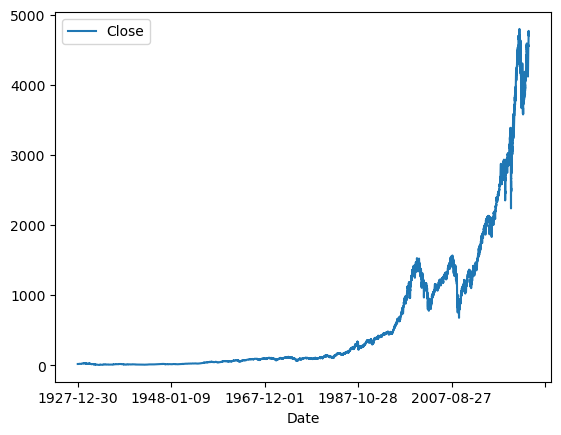

In [8]:
sp500.plot.line(y='Close', use_index=True)

In [9]:
sp500.drop(columns=['Dividends', 'Stock Splits'])

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-12-15,4714.229980,4725.529785,4704.689941,4719.189941,8218980000
2023-12-18,4725.580078,4749.520020,4725.580078,4740.560059,4060340000
2023-12-19,4743.720215,4768.689941,4743.720215,4768.370117,4026970000


In [10]:
sp500['Tomorrow'] = sp500['Close'].shift(-1)
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow
Date,,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000
...,...,...,...,...,...,...,...,...
2023-12-15,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,0.0,0.0,4740.560059
2023-12-18,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,0.0,0.0,4768.370117
2023-12-19,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,0.0,0.0,4698.350098


In [11]:
sp500['Tomorrow'] > sp500['Close']

Date
1927-12-30     True
1928-01-03    False
1928-01-04    False
1928-01-05     True
1928-01-06    False
              ...  
2023-12-15     True
2023-12-18     True
2023-12-19    False
2023-12-20     True
2023-12-21    False
Length: 24110, dtype: bool

In [12]:
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000,1
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000,1
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000,0
...,...,...,...,...,...,...,...,...,...
2023-12-15,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,0.0,0.0,4740.560059,1
2023-12-18,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,0.0,0.0,4768.370117,1
2023-12-19,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,0.0,0.0,4698.350098,0


In [13]:
sp500 = sp500.loc['1980-01-01':].copy()
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1980-01-02,0.000000,108.430000,105.290001,105.760002,40610000,0.0,0.0,105.220001,0
1980-01-03,0.000000,106.080002,103.260002,105.220001,50480000,0.0,0.0,106.519997,1
1980-01-04,0.000000,107.080002,105.089996,106.519997,39130000,0.0,0.0,106.809998,1
1980-01-07,0.000000,107.800003,105.800003,106.809998,44500000,0.0,0.0,108.949997,1
1980-01-08,0.000000,109.290001,106.290001,108.949997,53390000,0.0,0.0,109.050003,1
...,...,...,...,...,...,...,...,...,...
2023-12-15,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,0.0,0.0,4740.560059,1
2023-12-18,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,0.0,0.0,4768.370117,1
2023-12-19,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,0.0,0.0,4698.350098,0


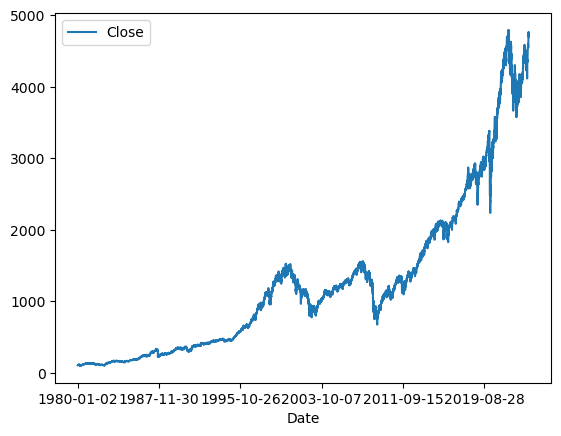

In [14]:
sp500.plot.line(y='Close', use_index=True);

In [15]:
# by Time series data it is a bad idea to use cross validation.
#  You can’t just mix up the days randomly.
# and data leakage can be if you split your data randomly

In [16]:
from sklearn.ensemble import RandomForestClassifier  # It is good against overfitting

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500[:-100]
test = sp500[-100:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])

/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


RandomForestClassifier(min_samples_split=100, random_state=1)

In [17]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds

/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [18]:
preds = pd.DataFrame(preds, index=test.index)
preds

,0
Date,
2023-08-02,1
2023-08-03,0
2023-08-04,1
2023-08-07,1
2023-08-08,1
...,...
2023-12-15,0
2023-12-18,0
2023-12-19,0


In [19]:
precision_score(test['Target'], preds)

0.5303030303030303

<Axes: xlabel='Date'>

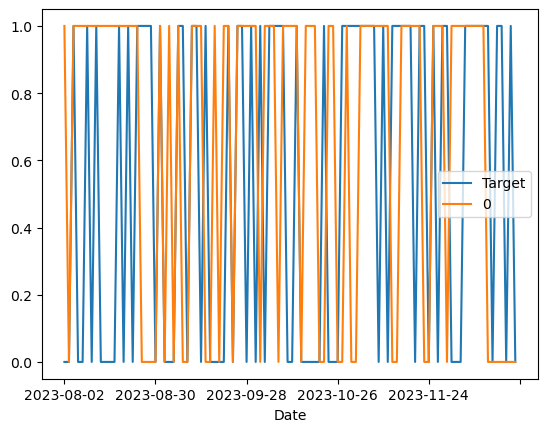

In [20]:
combined = pd.concat([test['Target'], preds], axis=1)
combined.plot()